Text(0.5, 1.0, 'Vacuum Rabi oscillations')

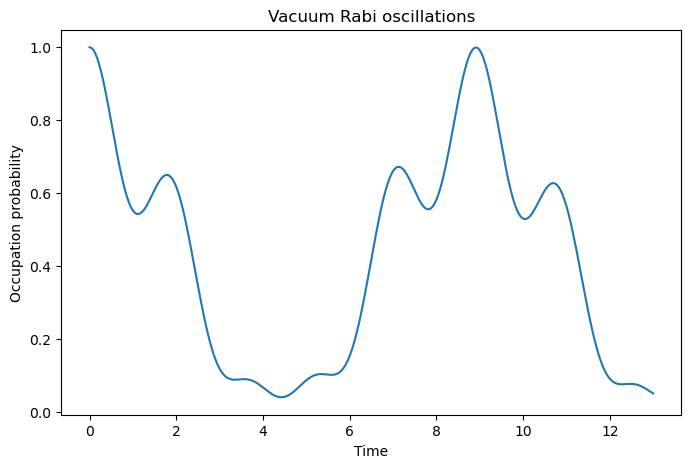

In [3]:
#So first I should call the libraries that I'm using numpy,qutip,scipy,and matplot
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qutip import *

'''
I need to define my ladder operators, however this is a 3-level system. So first determine the 3-D 
Pauli matrices. Then a linear combination of the S_x(3) and S_y(3) will give us our raising and 
lowering operators. (Don't fully understand why we are using the Pauli's, outside of using the 
argument that infinite dim Hilbert space creation and annihalation operators can not be truncated
without causing major fuckery). I think I remember Matteo mentioning that this was a rotating wave
approximation dealio... but I'm not entirely sure what he means by that. Anyway we have operators 
that take us between the three states as well as the S_z(3) operator which remains in the same state.
Knowing this, I used the framework defined in this link
(https://qutip.org/docs/4.0.2/modules/qutip/three_level_atom.html) to define operators to be used in 
this simulation.
'''
#This is used when defining the operators for raising and lowering operators, because the ones given
#in qutip are not applicable. 
'''def qutrit_basis():
    """Basis states for a three level system (qutrit)

    Returns
    -------
    qstates : array
        Array of qutrit basis vectors

    """
    out = np.empty((3,), dtype=object)
    out[:] = [basis(3, 0), basis(3, 1), basis(3, 2)]
    return out'''

def three_level_ops():
    ''' Operators for a three level system (qutrit)

    Returns
    --------
    sig11 : Ground to ground
    sig22 : 1st excited to 1st excited
    sig33 : 2nd excited to 2nd excited
    sig21 : 1st excited to ground
    sig32 : 2nd excited to 1st excited

    '''
    one, two, three = qutrit_basis()
    # Note that the three level operators are different
    # from the qutrit operators. A three level atom only
    # has transitions 1 <-> 2 <-> 3, so we define the
    # operators seperately from the qutrit code
    sig11 = one * one.dag()
    sig22 = two * two.dag()
    sig33 = three * three.dag()
    sig21 = two * one.dag()
    sig32 = three * two.dag()
    return sig11, sig22, sig33, sig21, sig32

'''
Now that we've defined the basis for our 3-level system. We can now perform operations on it. To do
this we refer to the qutip two-photon interference to set up the problem for the Lindbladian master 
equation solver to calculate expectation values. This follows the following documentation:
(https://notebook.community/ajgpitch/qutip-notebooks/examples/pulse-wise-two-photon-interference).

'''

#time parameters
tlist = np.linspace(0, 13, 300) #linspace(start,stop,num)
#Returns num evenly spaced samples, calculated over the interval [start, stop]
taulist = tlist #if we calculate g(2) we need a list time for the photon separations

#Gaussian wavepacket parameters
tp = 0.060       # Gaussian pulse parameter - used the parameter given on the site 
Om = 19.40                  # driving strength - used parameter given on the site
t_offset = 0.405 #temporal offset for the first photon - used parameter given on the site
#The parameters found above are subject to change
pulse_shape = Om/2 * np.exp(-(tlist - t_offset) ** 2 /
                                (2 * tp ** 2))
#Two times the Gaussian pulse parameter gives us the standard deviation (sigma)

# initial state
psi0 = fock(3, 0)              # ground state

sig11, sig22, sig33, sig21, sig32 = three_level_ops() # operators
#(Don't think that I need this)
n = [sig21.dag()*sig21,sig32.dag()*sig32]           # number operator

# Hamiltonian
del_x=2*np.pi*0.335
#Energy difference between the virtual level of the two photon transition and exciton energy
del_b=0 #Excitation is done resonantly, therefore 0
#Detuning between the two-photon resonance and the energy of the laser driving the system
sig11, sig22, sig33, sig21, sig32 = three_level_ops()
H = (sig21.dag()+sig32.dag()+sig21+sig32)+(del_x-del_b)*(sig33-sig22)-(2*del_b)*(sig)

# collapse operator that describes dissipation
gamma_b=1
gamma_x=1
gamma_I_0= 0.0349
gamma_deph_x=gamma_I_0*(Om**2)
gamma_deph_b=gamma_I_0*(Om**2)
sig11, sig22, sig33, sig21, sig32 = three_level_ops()
c_ops = [np.sqrt(gamma_b)*sig32, np.sqrt(gamma_x)*sig21, np.sqrt(gamma_deph_b)*(sig33-sig22), np.sqrt(gamma_deph_x)*(sig22-sig11)]  
#The first two represent spontaneous emission with gamma_b representing the rate for the biexciton,
#and gamma_x resperesenting the rate for the exciton. Rates found to be 1/771 THz and 1/405 THz 
#respectively. The other two respresent the dephasing between biexciton and exciton and exciton and 
#ground states.

output=mesolve(H, psi0, tlist, [], n)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0])
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations')

#Now integrate this over infinite time

In [ ]:
'''
Interesting so taking out the Gaussian doesn't really help shit. Maybe I should redo this system by 
first redefining the two level system using three level operators, make sure that they're acting in 
the way that I expect them to. 
'''